Importante: 

Vycon records 60,024 f/s
Kinect records 30,7123 f/s

Manually delete the frames generated by the other notebook where the actor starts standing up and leaving the gaming table. 

The objective is for each frame select the immediate previous entry of the csv file exported from the vycon

***Se han limpiado los frames previos al inicio del mocap (Notebook "Split_mp4_to_frames_v0") y manualmente se han eliminado los frames donde el actor se levanta de la mesa (finales)***

Objetivo: Para cada frame pillar los datos del timestamp inmediato anterior del dataframe

### Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from glob import glob
import cv2
import operator
from glob import glob
import random

### Functions

In [2]:
def split_2_coordinates(values_array): 
    output = []
    for i in range(0, len(values_array)):
        m = 0
        r = 2
        frame_coordinates = []
        for j in range(0,int(len(values_array[i])/2)):
            frame_coordinates.append(values_array[i][m:r])
            m = r
            r = r+2
        output.append(frame_coordinates)
    return(output)

### Data syncronization

In [3]:
names = ['Xavi','Mireia','Adri']
indexes = ['01','02','03','04','05']



for name in names:
    for number in indexes:
        csv = glob('../data_export_1/Kinect/'+name+'/'+name+number+'/*.csv')[0].split('\\')[-1]
        df = pd.read_csv('../data_export_1/Kinect/'+name+'/'+str(name)+str(number)+'/'+csv)
        
        final_df = pd.DataFrame(columns=list(df.columns))
        
        for filename in glob('../data_export_1/Kinect/'+name+'/'+name+number+'/mp4_splitted/*'):
            
            frame_timecode = (round(float(filename.split('\\')[-1].split('.jpg')[0].split('_')[-1]),3))

            #Selecciono las rows que sean mas pequeñas que el valor del timecode y me quedo con el mas cercano (mas cercano == max)
            final_df = final_df.append(df[df['timecode']==df[df['timecode']<frame_timecode]['timecode'].max()]) 
            
        columns_3d = list(df.columns)[0:19]
        get1 = operator.itemgetter(0,19,20,21,22,23,24,25,26,27,28,29,30)
        columns_2d = list(get1(list(df.columns)))
        final_df_3d = final_df[columns_3d].reset_index().drop(columns=['index'])
        final_df_2d = final_df[columns_2d].reset_index().drop(columns=['index'])
        
        final_df_2d.to_csv('../data_export_1/Kinect/'+name+'/'+name+number+'/filtered_csv/2d_TIMECODE_'+name+number+'.csv',index=None)
        final_df_3d.to_csv('../data_export_1/Kinect/'+name+'/'+name+number+'/filtered_csv/3d_TIMECODE_'+name+number+'.csv',index=None)

### Visualization


Xavi 01


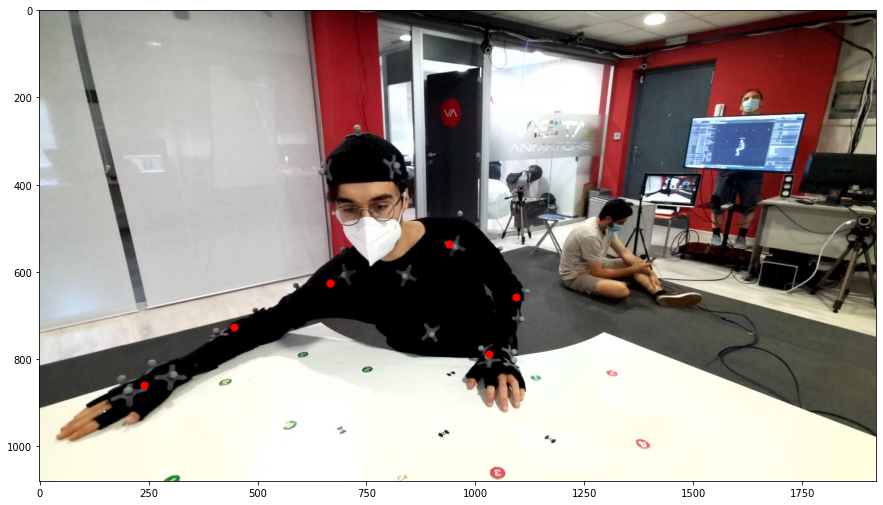

In [31]:
random_actor = names[random.randint(0,len(names)-1)]
random_index = indexes[random.randint(0,len(indexes)-1)]
# random_actor = 'Mireia'
# random_index = '05'

image_random_index = random.randint(0,len(glob('../data_export_1/Kinect/'+random_actor+'/'+random_actor+random_index+'/mp4_splitted/*.jpg'))-1)



image1 = cv2.imread(glob('../data_export_1/Kinect/'+random_actor+'/'+random_actor+random_index+'/mp4_splitted/*.jpg')[image_random_index])
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
vis_df = pd.read_csv('../data_export_1/Kinect/'+random_actor+'/'+random_actor+random_index+'/filtered_csv/2d_TIMECODE_'+random_actor+random_index+'.csv')

vis_df2 = vis_df.drop(columns=['timecode'])
coords_image1  = np.array(split_2_coordinates(np.array(vis_df2))[image_random_index])
plt.figure(figsize=(15,15))
plt.imshow(image1)
plt.scatter(coords_image1[:,0],coords_image1[:,1], color='red', s = 50)
print(random_actor, random_index)

### Single checking

Xavi 01


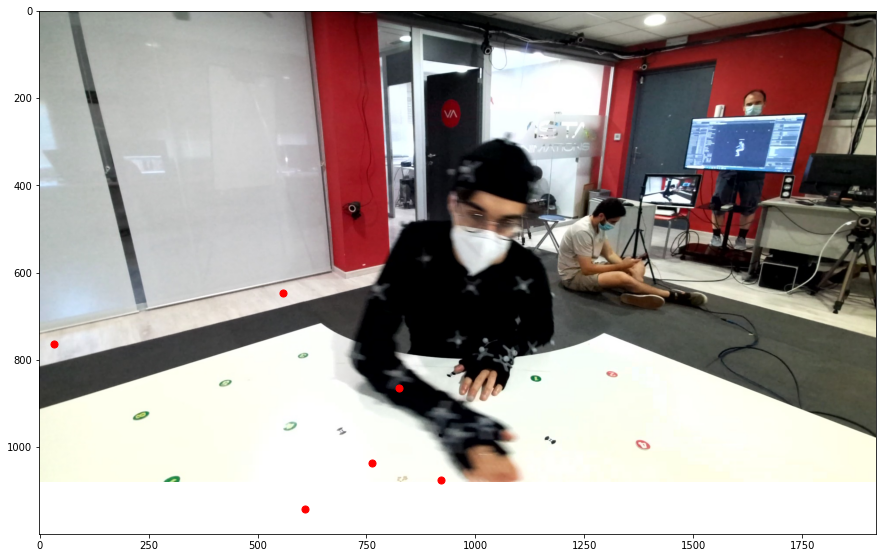

In [110]:
# random_actor = names[random.randint(0,len(names)-1)]
# random_index = indexes[random.randint(0,len(indexes)-1)]
random_actor = 'Xavi'
random_index = '04'

image_random_index = random.randint(0,len(glob('../data_export_1/Kinect/'+random_actor+'/'+random_actor+random_index+'/mp4_splitted/*.jpg'))-1)
image_random_index
image1 = cv2.imread(glob('../data_export_1/Kinect/'+random_actor+'/'+random_actor+random_index+'/mp4_splitted/*.jpg')[image_random_index])
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
vis_df = pd.read_csv('../data_export_1/Kinect/'+random_actor+'/'+random_actor+random_index+'/filtered_csv/2d_TIMECODE_'+random_actor+random_index+'.csv')
vis_df2 = vis_df.drop(columns=['timecode'])
coords_image1  = np.array(split_2_coordinates(np.array(vis_df))[image_random_index])
plt.figure(figsize=(15,15))
plt.imshow(image1)
plt.scatter(coords_image1[:,0],coords_image1[:,1], color='red', s = 50)
print(random_actor, random_index)